In [ ]:
pip install opencv-python


     ---------------------------------------- 38.1/38.1 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import seaborn as sns

In [ ]:
data=pd.read_csv('HAM10000_metadata.csv')

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
data=data.drop(columns=['lesion_id'])

In [ ]:
data.head()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
## Now Find missing values
data.isnull().sum()

image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [ ]:
## removing the missing values
data=data.dropna()

In [ ]:
data.isnull().sum()

image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

C:\Users\khotv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


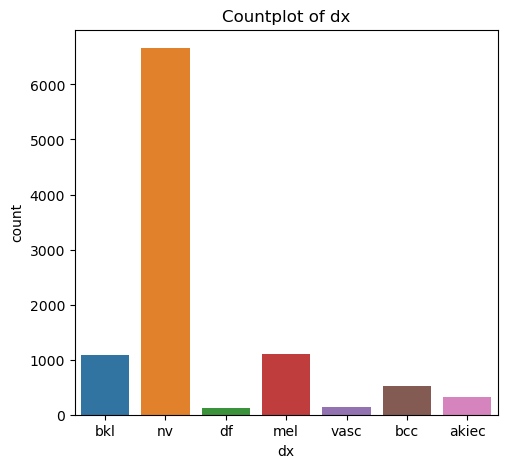

In [ ]:
# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot the first countplot
plt.subplot(1, 2, 1)
sns.countplot(data['dx'])
plt.title('Countplot of dx')
plt.show()


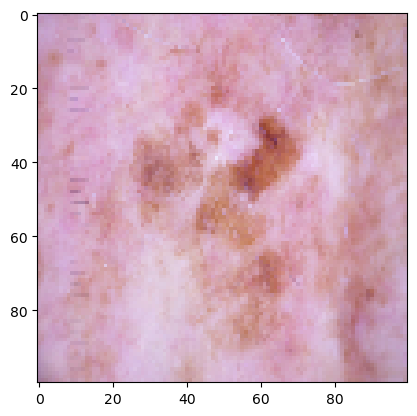

bkl


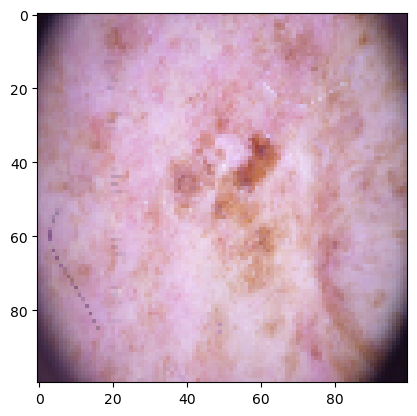

bkl


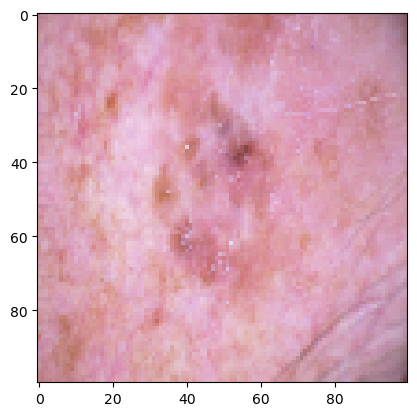

bkl


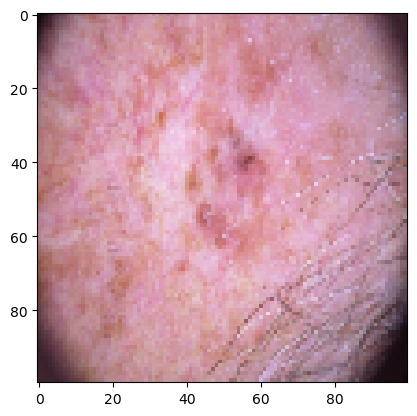

bkl


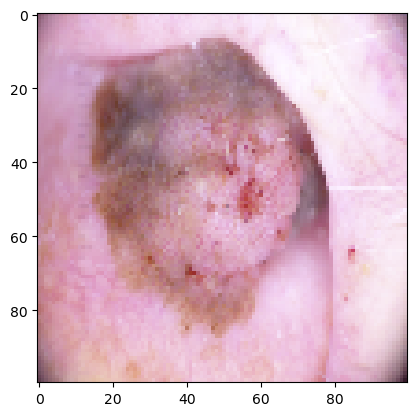

bkl


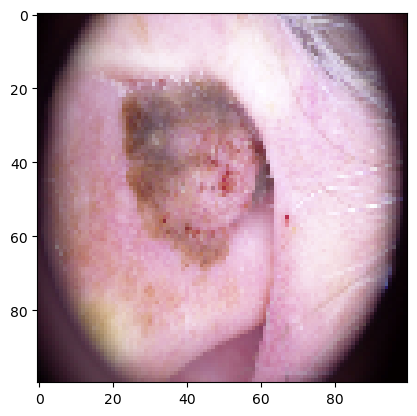

bkl


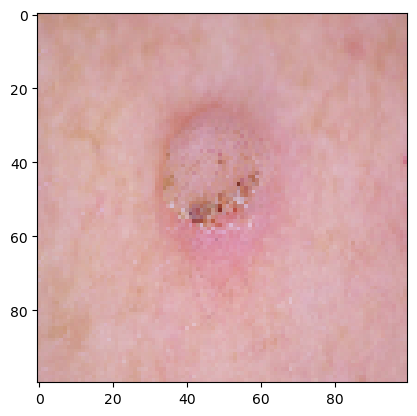

bkl


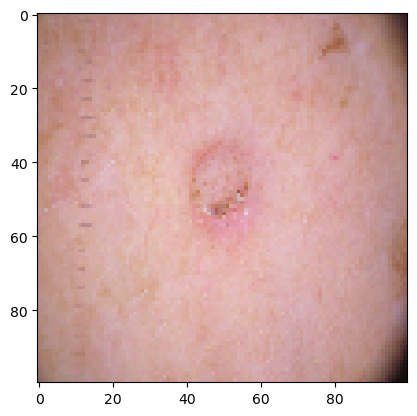

bkl


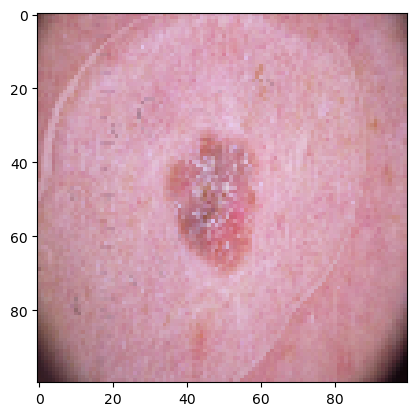

bkl


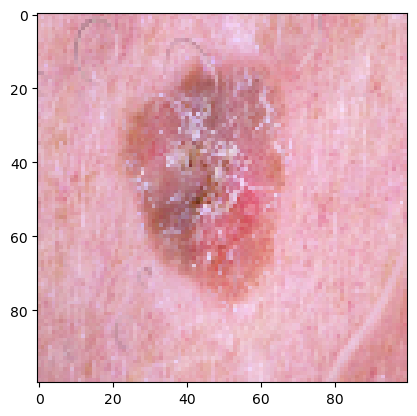

bkl


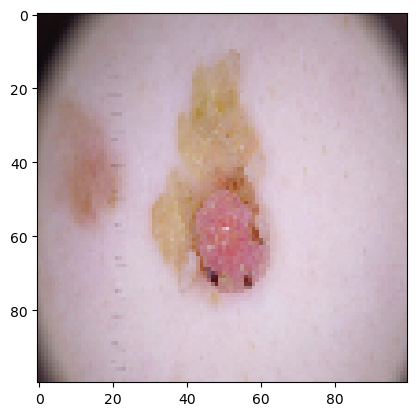

bkl


In [ ]:
PATH='C:\\Users\\khotv\\images'

#plot the data
count=0
for row in data.iterrows():


    #print(row[1][0])
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    #image_value.append([img_arr])

    plt.imshow(img_arr)
    plt.show()
    print(row[1][1])

    if count==10:
        break
    count+=1

In [ ]:
PATH='C:\\Users\\khotv\\images'

image_value=[]
for row in data.iterrows():

    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,row[1][1]])


In [ ]:
len(image_value)

9958

In [ ]:
import random
random.shuffle(image_value)

In [ ]:
X=[]
y=[]

for feature,label in image_value:
    X.append(feature)
    y.append(label)

len(X),len(y)

(9958, 9958)

In [ ]:
##Now we do label encoding
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
y=lbl.fit_transform(y)
y.shape

(9958,)

In [ ]:
# now we do the train test split
from sklearn.model_selection import train_test_split

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [ ]:
from keras.utils import to_categorical

In [ ]:
one_hot_train=to_categorical(train_y)
one_hot_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
#array reshape
train_X=np.array(train_X).reshape(-1,100,100,3)
train_X=train_X/255.0
test_X=np.array(test_X).reshape(-1,100,100,3)
test_X=test_X/255.0

train_X.shape,test_X.shape,one_hot_train.shape,one_hot_test.shape

((7966, 100, 100, 3), (1992, 100, 100, 3), (7966, 7), (1992, 7))

In [ ]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# CNN Implementation

In [ ]:
#Import libraries
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU


In [ ]:
#create convolution
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))

In [ ]:
#add Dense layer
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(7, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 64)        0

In [ ]:
#compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#Train the model
history=model.fit(train_X,one_hot_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 45s 873ms/step - loss: 1.3807 - accuracy: 0.6262 - val_loss: 1.3324 - val_accuracy: 0.6644
Epoch 2/10
50/50 [==============================] - 47s 943ms/step - loss: 1.0411 - accuracy: 0.6703 - val_loss: 1.2068 - val_accuracy: 0.6644
Epoch 3/10
50/50 [==============================] - 48s 965ms/step - loss: 0.9846 - accuracy: 0.6703 - val_loss: 1.0801 - val_accuracy: 0.6644
Epoch 4/10
50/50 [==============================] - 51s 1s/step - loss: 0.9510 - accuracy: 0.6731 - val_loss: 1.0676 - val_accuracy: 0.6644
Epoch 5/10
50/50 [==============================] - 54s 1s/step - loss: 0.9324 - accuracy: 0.6729 - val_loss: 0.9855 - val_accuracy: 0.6863
Epoch 6/10
50/50 [==============================] - 61s 1s/step - loss: 0.8912 - accuracy: 0.6816 - val_loss: 1.0014 - val_accuracy: 0.6870
Epoch 7/10
50/50 [==============================] - 61s 1s/step - loss: 0.8529 - accuracy: 0.6968 - val_loss: 0.9417 - val_accuracy: 0.6775
Epoch 8/10


In [ ]:
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

63/63 [==============================] - 3s 48ms/step - loss: 0.8118 - accuracy: 0.7038


(0.8118477463722229, 0.7038152813911438)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict the class labels for the test set
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(one_hot_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate additional performance metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')


63/63 [==============================] - 3s 52ms/step


C:\Users\khotv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the confusion matrix and performance metrics
print("Confusion Matrix:")
print(confusion_mtx)

print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Generate and print the classification report
report = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report:\n", report)

Confusion Matrix:
[[   6   12   23    0    2   14    0]
 [   3   25   38    0    2   34    1]
 [   1   10  123    0   11   90    1]
 [   1    3    9    0    0    5    0]
 [   0    0   45    0   48  132    0]
 [   0    7   79    0   47 1197    0]
 [   0    0    1    0    3   16    3]]

Accuracy: 70.38%
Precision: 0.68
Recall: 0.70
F1 Score: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.11      0.18        57
           1       0.44      0.24      0.31       103
           2       0.39      0.52      0.44       236
           3       0.00      0.00      0.00        18
           4       0.42      0.21      0.28       225
           5       0.80      0.90      0.85      1330
           6       0.60      0.13      0.21        23

    accuracy                           0.70      1992
   macro avg       0.46      0.30      0.33      1992
weighted avg       0.68      0.70      0.68      1992



C:\Users\khotv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khotv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khotv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


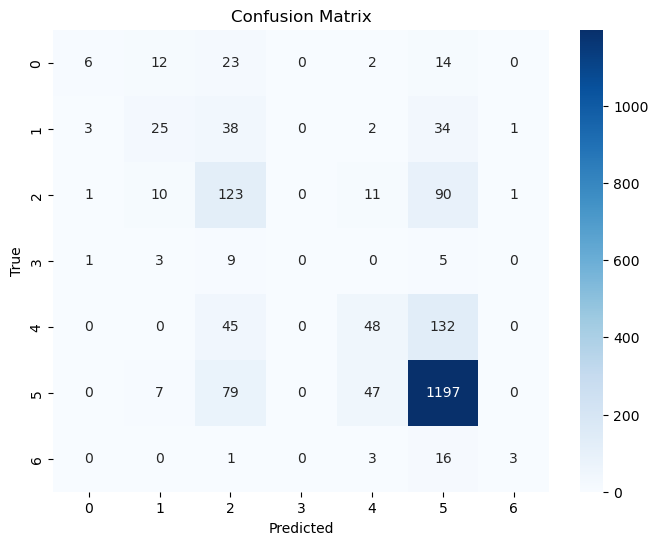

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

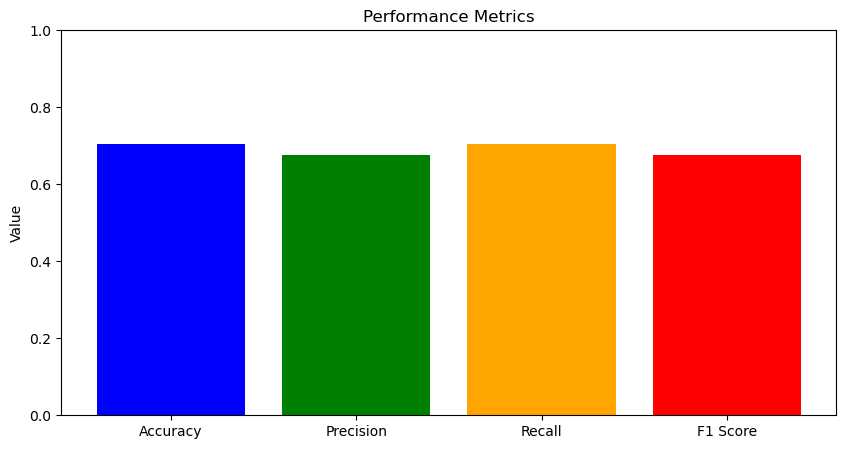

In [ ]:
# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()

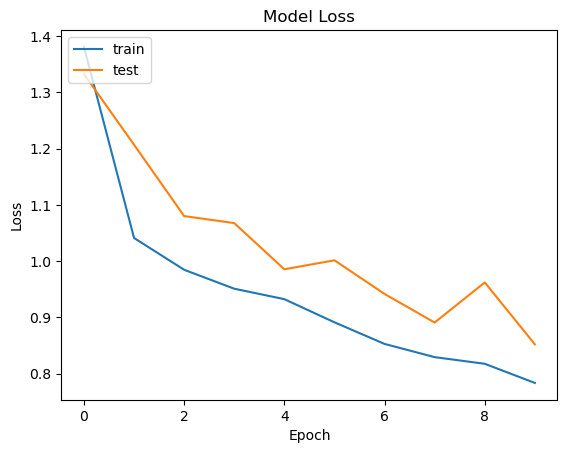

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


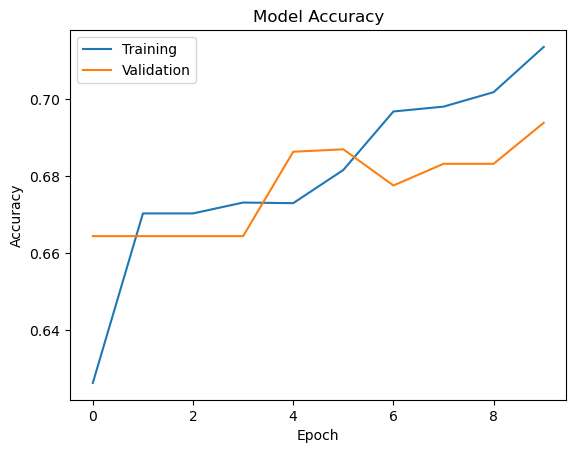

In [ ]:
# Check the available keys in the history object
print(history.history.keys())

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
